# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [130]:
#Type your code here
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. Memuat Dataset dari Hasil Clustering**
Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [131]:
# Gunakan dataset hasil clustering yang memiliki fitur Target
# Silakan gunakan dataset data_clustering jika tidak menerapkan Interpretasi Hasil Clustering [Advanced]
# Silakan gunakan dataset data_clustering_inverse jika menerapkan Interpretasi Hasil Clustering [Advanced]
#Type your code here
# Load dataset hasil clustering
file_path = '/content/drive/MyDrive/Projek Akhir ML untuk pemula/data_clustering.csv'

df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2398 entries, 0 to 2397
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionAmount        2398 non-null   float64
 1   TransactionDate          2398 non-null   float64
 2   TransactionType          2398 non-null   float64
 3   Location                 2398 non-null   float64
 4   Channel                  2398 non-null   float64
 5   CustomerAge              2398 non-null   float64
 6   CustomerOccupation       2398 non-null   float64
 7   TransactionDuration      2398 non-null   float64
 8   LoginAttempts            2398 non-null   float64
 9   AccountBalance           2398 non-null   float64
 10  PreviousTransactionDate  2398 non-null   float64
 11  AccountBalance_Binned    2398 non-null   int64  
 12  CustomerAge_Binned       2398 non-null   int64  
 13  Target                   2398 non-null   int64  
dtypes: float64(11), int64(3)

In [132]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AccountBalance_Binned,CustomerAge_Binned,Target
0,-0.970546,680.0,1.0,36.0,0.0,1.419862,0.0,-0.548393,-0.204629,-0.000315,105.0,1,3,0
1,0.268963,1178.0,1.0,15.0,0.0,1.307715,0.0,0.307960,-0.204629,2.218381,192.0,4,3,0
2,-0.586526,1262.0,1.0,23.0,2.0,-1.439874,3.0,-0.905207,-0.204629,-1.024091,41.0,0,0,0
3,-0.387294,818.0,1.0,33.0,2.0,-1.047361,3.0,-1.347656,-0.204629,0.886694,163.0,2,0,0
4,-0.703375,635.0,1.0,28.0,0.0,-1.495947,3.0,0.750409,-0.204629,-1.111505,13.0,0,0,0


# **3. Data Splitting**
Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [133]:
# Menggunakan train_test_split() untuk melakukan pembagian dataset.
X = df.drop('Target', axis=1)
y = df['Target']

# Membagi data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4. Membangun Model Klasifikasi**
Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Menggunakan algoritma klasifikasi yaitu Decision Tree.
2. Latih model menggunakan data yang sudah dipisah.

In [134]:
# Buatlah model klasifikasi menggunakan Decision Tree

# Inisialisasi model Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)

In [135]:
# Menyimpan Model
# import joblib
# joblib.dump(model, 'decision_tree_model.h5')
import joblib
joblib.dump(dt_classifier, 'decision_tree_model.h5')

['decision_tree_model.h5']

# **5. Memenuhi Kriteria Skilled dan Advanced dalam Membangun Model Klasifikasi**



**Biarkan kosong jika tidak menerapkan kriteria skilled atau advanced**

In [136]:
# Melatih model menggunakan algoritma klasifikasi selain Decision Tree.
# Latih model menggunakan data training
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Decision Tree:
Accuracy: 0.9979166666666667
Precision: 0.9979329427083333
Recall: 0.9979166666666667
F1-Score: 0.9979160382101558


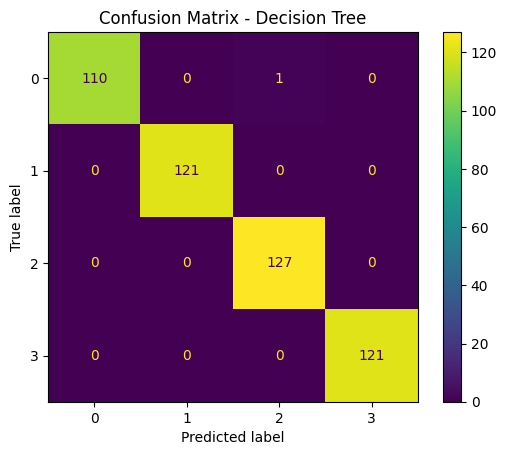

In [137]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.
# Memprediksi label kelas untuk data uji
y_pred_dt = dt_classifier.predict(X_test)

# Evaluasi performa model Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print("Decision Tree:")
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1-Score: {f1_dt}")

# Contoh visualisasi Confusion Matrix untuk Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp_dt.plot()
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [138]:
# Menyimpan Model Selain Decision Tree
# Model ini bisa lebih dari satu
# import joblib
# joblib.dump(___, 'explore_<Nama Algoritma>_classification.h5')
joblib.dump(dt_classifier, 'explore_decision_tree_classification.h5')

['explore_decision_tree_classification.h5']

Hyperparameter Tuning Model

Pilih salah satu algoritma yang ingin Anda tuning

In [139]:
# Lakukan Hyperparameter Tuning dan Latih ulang.
# Definisikan parameter yang akan dicoba
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi Grid Search
grid_search = GridSearchCV(estimator=dt_classifier,
                           param_grid=param_grid,
                           cv=5,               # 5-fold cross validation
                           n_jobs=-1,          # gunakan semua core
                           scoring='accuracy', # metrik yang digunakan
                           verbose=1)

# Jalankan grid search
grid_search.fit(X_train, y_train)

# Tampilkan hasil terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.9973903938207137


In [140]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada algoritma yang sudah dituning.
# Evaluasi model terbaik pada data uji
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       111
           1       1.00      1.00      1.00       121
           2       0.99      1.00      1.00       127
           3       1.00      1.00      1.00       121

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



In [141]:
# Menyimpan Model hasil tuning
# import joblib
# joblib.dump(model_dt, 'tuning_classification.h5')
joblib.dump(best_dt, 'tuning_classification.h5')

['tuning_classification.h5']